In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

plt.style.use('seaborn')
SMALL_SIZE = 8
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
np.random.seed(6)

### G1

In [3]:
ITE = 100000
N_player = 3
N = 1 #stochastic policy gradient sample number

mu_init = [0.6, 0.4, 0.2]
sigma_init = 0.05*np.ones(N_player,)
ind_cost = [0, 0, 0]
lr = 0.08
lr_gamma = 0.99997 

def price(acts):
    p = 1-sum(acts)
    return p

In [4]:
act = np.zeros((N_player, ITE))
u = np.zeros((N_player, ITE))
reward_pg = np.zeros((N_player, ITE))
mu = np.zeros((N_player, ITE))
sigma = np.zeros((N_player, ITE))
plist = []


for t in range(ITE-1):
    # learning rate
    lr = np.multiply(lr, lr_gamma)

    #Sample an action
    for j in range(N_player):
        act[j, t] = np.random.normal(mu[j, t], sigma[j, t], 1)
        act[j, t] = np.max([act[j, t], 0])

    # Calculate price
    p = price(act[:, t])
    plist.append(p)

    # Calculate reward
    for j in range(N_player):
        u[j, t] = p*act[j, t]-ind_cost[j]*act[j, t]
        if(t>0):
            reward_pg[j, t] = reward_pg[j, t-1] + u[j, t]
        else:
            reward_pg[j, t] = u[j, t]


    # Policy gradient update
    for j in range(N_player):
        if(t==0):
            mu[j, t] = mu_init[j]
            sigma[j, t] = sigma_init[j]

        mu[j, t+1] = mu[j, t] + lr*1/N*np.sum(np.multiply(u[j, t], act[j, t]-mu[j, t]))
        sigma[j, t+1] = sigma[j, t]

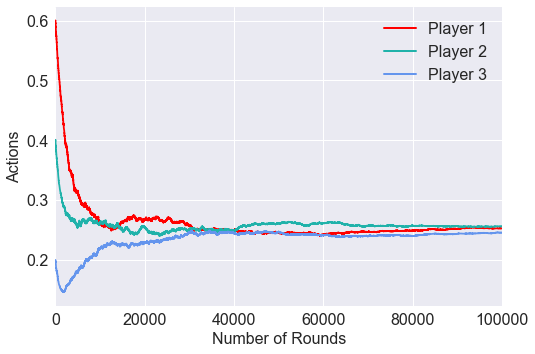

In [5]:
num_data = np.arange(0, ITE)

from matplotlib.lines import Line2D
fig, ax = plt.subplots()
colors = ['red','lightseagreen','cornflowerblue']
for n in range(N_player):
    if(n==0):
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
    elif(n==1):
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
    else:
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
ax.grid(True)
ax.set_xlabel('Number of Rounds')
ax.set_ylabel('Actions')
ax.set_xlim([0, 100000])

custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='lightseagreen', lw=2),
                Line2D([0], [0], color='cornflowerblue', lw=2)]
ax.legend(custom_lines, ['Player 1', 'Player 2', 'Player 3'])

### G2

In [6]:
ITE = 100000
N_player = 3

mu_init = [0.6, 0.4, 0.2]
sigma_init = 0.05*np.ones(N_player,)
ind_cost = [0.1, 0.2, 0.3]
lr = 0.08
lr_gamma = 0.99997 

def price(acts):
    p = 1-sum(acts)
    return p

In [7]:
act = np.zeros((N_player, ITE))
u = np.zeros((N_player, ITE))
reward_pg = np.zeros((N_player, ITE))
mu = np.zeros((N_player, ITE))
sigma = np.zeros((N_player, ITE))
plist = []


for t in range(ITE-1):
    # learning rate
    lr = np.multiply(lr, lr_gamma)

    #Sample an action
    for j in range(N_player):
        act[j, t] = np.random.normal(mu[j, t], sigma[j, t], 1)
        act[j, t] = np.max([act[j, t], 0])

    # Calculate price
    p = price(act[:, t])
    plist.append(p)

    # Calculate reward
    for j in range(N_player):
        u[j, t] = p*act[j, t]-ind_cost[j]*act[j, t]
        if(t>0):
            reward_pg[j, t] = reward_pg[j, t-1] + u[j, t]
        else:
            reward_pg[j, t] = u[j, t]


    # Policy gradient update
    for j in range(N_player):
        if(t==0):
            mu[j, t] = mu_init[j]
            sigma[j, t] = sigma_init[j]

        mu[j, t+1] = mu[j, t] + lr*1/N*np.sum(np.multiply(u[j, t], act[j, t]-mu[j, t]))
        sigma[j, t+1] = sigma[j, t]

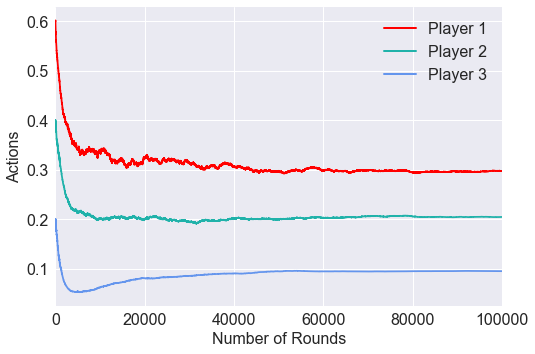

In [8]:
num_data = np.arange(0, ITE)

from matplotlib.lines import Line2D
fig, ax = plt.subplots()
colors = ['red','lightseagreen','cornflowerblue']
for n in range(N_player):
    if(n==0):
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
    elif(n==1):
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
    else:
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
ax.grid(True)
ax.set_xlabel('Number of Rounds')
ax.set_ylabel('Actions')
ax.set_xlim([0, 100000])

custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='lightseagreen', lw=2),
                Line2D([0], [0], color='cornflowerblue', lw=2)]
ax.legend(custom_lines, ['Player 1', 'Player 2', 'Player 3'])

### G3

In [9]:
ITE = 100000
N_player = 2

mu_init = [0.5, 0.3]
sigma_init = 0.05*np.ones(N_player,)
ind_cost = [0, 0]
lr = 0.08
lr_gamma = 0.99997 

def price(acts):
    p = 1-sum(acts)**2
    return p

In [10]:
act = np.zeros((N_player, ITE))
u = np.zeros((N_player, ITE))
reward_pg = np.zeros((N_player, ITE))
mu = np.zeros((N_player, ITE))
sigma = np.zeros((N_player, ITE))
plist = []


for t in range(ITE-1):
    # learning rate
    lr = np.multiply(lr, lr_gamma)

    #Sample an action
    for j in range(N_player):
        act[j, t] = np.random.normal(mu[j, t], sigma[j, t], 1)
        act[j, t] = np.max([act[j, t], 0])

    # Calculate price
    p = price(act[:, t])
    plist.append(p)

    # Calculate reward
    for j in range(N_player):
        u[j, t] = p*act[j, t]-ind_cost[j]*act[j, t]
        if(t>0):
            reward_pg[j, t] = reward_pg[j, t-1] + u[j, t]
        else:
            reward_pg[j, t] = u[j, t]


    # Policy gradient update
    for j in range(N_player):
        if(t==0):
            mu[j, t] = mu_init[j]
            sigma[j, t] = sigma_init[j]

        mu[j, t+1] = mu[j, t] + lr*1/N*np.sum(np.multiply(u[j, t], act[j, t]-mu[j, t]))
        sigma[j, t+1] = sigma[j, t]

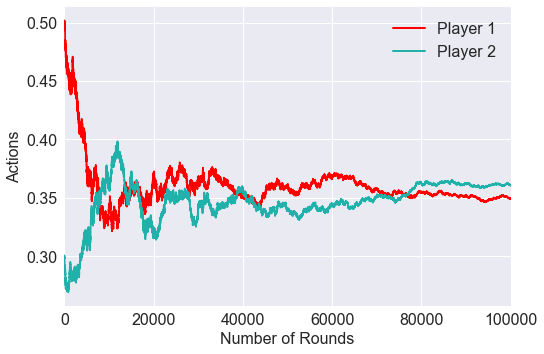

In [11]:
num_data = np.arange(0, ITE)

from matplotlib.lines import Line2D
fig, ax = plt.subplots()
colors = ['red','lightseagreen','cornflowerblue']
for n in range(N_player):
    if(n==0):
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
    elif(n==1):
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
    else:
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
ax.grid(True)
ax.set_xlabel('Number of Rounds')
ax.set_ylabel('Actions')
ax.set_xlim([0, 100000])

custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='lightseagreen', lw=2)]
ax.legend(custom_lines, ['Player 1', 'Player 2'])

### G4 (Note there's a typo in the orignal paper, the price function for G4 is $1-(x_1+x_2)^3$)

In [12]:
np.random.seed(6)
ITE = 100000
N_player = 2

mu_init = [0.5, 0.3]
sigma_init = 0.05*np.ones(N_player,)
ind_cost = [0, 0]
lr = 0.08
lr_gamma = 0.99997

def price(acts):
    p = 1-sum(acts)**3
    return p

In [13]:
act = np.zeros((N_player, ITE))
u = np.zeros((N_player, ITE))
reward_pg = np.zeros((N_player, ITE))
mu = np.zeros((N_player, ITE))
sigma = np.zeros((N_player, ITE))
plist = []


for t in range(ITE-1):
    # learning rate
    lr = np.multiply(lr, lr_gamma)

    #Sample an action
    for j in range(N_player):
        act[j, t] = np.random.normal(mu[j, t], sigma[j, t], 1)
        act[j, t] = np.max([act[j, t], 0])

    # Calculate price
    p = price(act[:, t])
    plist.append(p)

    # Calculate reward
    for j in range(N_player):
        u[j, t] = p*act[j, t]-ind_cost[j]*act[j, t]
        if(t>0):
            reward_pg[j, t] = reward_pg[j, t-1] + u[j, t]
        else:
            reward_pg[j, t] = u[j, t]


    # Policy gradient update
    for j in range(N_player):
        if(t==0):
            mu[j, t] = mu_init[j]
            sigma[j, t] = sigma_init[j]

        mu[j, t+1] = mu[j, t] + lr*1/N*np.sum(np.multiply(u[j, t], act[j, t]-mu[j, t]))
        sigma[j, t+1] = sigma[j, t]

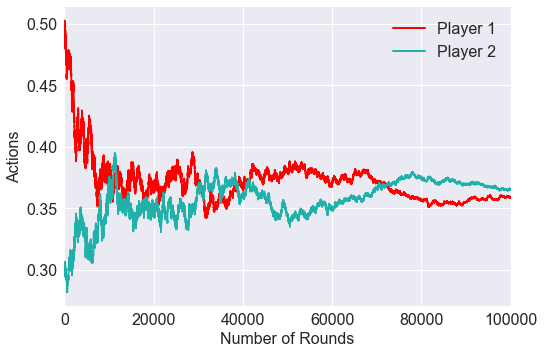

In [14]:
num_data = np.arange(0, ITE)

from matplotlib.lines import Line2D
fig, ax = plt.subplots()
colors = ['red','lightseagreen','cornflowerblue']
for n in range(N_player):
    if(n==0):
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
    elif(n==1):
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
    else:
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
ax.grid(True)
ax.set_xlabel('Number of Rounds')
ax.set_ylabel('Actions')
ax.set_xlim([0, 100000])

custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='lightseagreen', lw=2)]
ax.legend(custom_lines, ['Player 1', 'Player 2'])

### Investigative study: hetergenous players that do not follow policy gradient

In [15]:
ITE = 100000
N_player = 3

mu_init = np.zeros(N_player,)
mu_init = [0.6, 0.4, 0.2]
sigma_init = 0.05*np.ones(N_player,)
ind_cost = [0, 0, 0]
lr = 0.1
lr_gamma = 0.99997

In [16]:
def price(acts):
    p = 1-np.sum(acts)
    return p

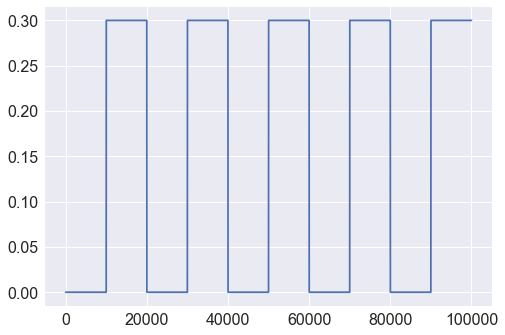

In [17]:
## construct a random player 
series1 = 0*np.ones(10000,)
series2 = 0.3*np.ones(10000,)
sys_play = np.concatenate((series1, series2))
a = np.tile(sys_play, 5)
plt.plot(a)

In [18]:
act = np.zeros((N_player, ITE))
u = np.zeros((N_player, ITE))
reward_pg = np.zeros((N_player, ITE))
mu = np.zeros((N_player, ITE))
sigma = np.zeros((N_player, ITE))
plist = []

for t in range(ITE-1):
    # learning rate
    lr = np.multiply(lr, lr_gamma)

    #Sample an action
    for j in range(N_player):
        if(j==0):
            act[j, t] = a[t] 
        else:
            act[j, t] = np.random.normal(mu[j, t], sigma[j, t], 1)
            act[j, t] = np.max([act[j, t], 0])

    # Calculate price
    p = price(act[:, t])
    plist.append(p)


    # Calculate reward
    for j in range(N_player):
        u[j, t] = p*act[j, t]-ind_cost[j]*act[j, t]
        if(t>0):
            reward_pg[j, t] = reward_pg[j, t-1] + u[j, t]
        else:
            reward_pg[j, t] = u[j, t]

    # Gradient update
    for j in range(N_player):
        if(t==0):
            mu[j, t] = mu_init[j]
            sigma[j, t] = sigma_init[j]

        mu[j, t+1] = mu[j, t] + lr*1/N*np.sum(np.multiply(u[j, t], act[j, t]-mu[j, t]))

        sigma[j, t+1] = sigma[j, t]

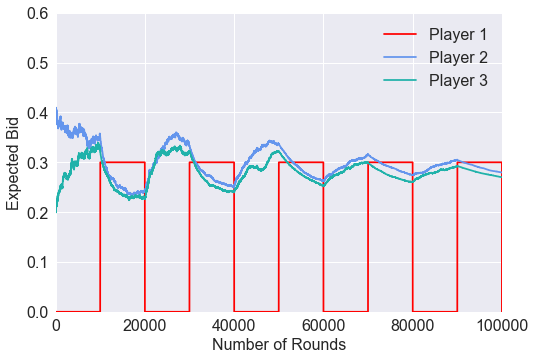

In [19]:
num_data = np.arange(0, ITE)

from matplotlib.lines import Line2D
fig, ax = plt.subplots()
colors = ['red','cornflowerblue','lightseagreen']
for n in range(N_player):
    if(n==0):
        plt.plot(num_data, act[n,:], alpha=1, color = colors[n],label='Player {}'.format(n+1))
    elif(n==1):
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
    else:
        plt.plot(num_data, mu[n,:], label='Player {}'.format(n+1), color = colors[n])
plt.grid(True)
plt.xlabel('Number of Rounds')
plt.ylabel('Expected Bid')
plt.xlim([0, 100000])
plt.ylim([0, 0.6])
plt.legend(loc='upper right')